#data analysis and wrangling 

In [6]:
import pandas as pd
import numpy as np 
import random as rnd

#visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

machine learning

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Import Training and test data set

In [9]:
train_df = pd.read_csv('TitanicDataAnalysis/data/train.csv')
test_df = pd.read_csv('TitanicDataAnalysis/data/test.csv')
combine = [train_df, test_df]

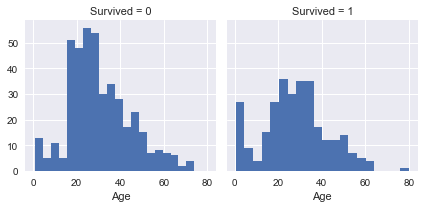

In [10]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)